In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc


### Dataset Selection

In [2]:
data = pd.read_csv("D:\RD\BITS -PG_AIML\Course 3 Classification\Assignment2\placementdata.csv")

In [3]:
# Display basic info
print("Dataset Overview:")
print(data.info())
print("\nFirst few rows:\n", data.head())
print("\nShape of data:\n",data.shape)
print("\nDataset Description:\n", data.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB
None

First few rows:
    

### Data Preprocessing

In [4]:
data = data.drop('StudentID', axis=1)

In [5]:
numerical_col = data.select_dtypes(include = ['float64', 'int'] )

data['ExtracurricularActivities'] = data['ExtracurricularActivities'].astype('category')
data['PlacementTraining'] = data['PlacementTraining'].astype('category')

categorical_col = data.select_dtypes(include = ['object', 'category']).columns

print(categorical_col)

unique_values = {col:data[col].unique() for col in categorical_col}


print("\n Unique values for catgorical columns")
print(unique_values)

Index(['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus'], dtype='object')

 Unique values for catgorical columns
{'ExtracurricularActivities': ['No', 'Yes']
Categories (2, object): ['No', 'Yes'], 'PlacementTraining': ['No', 'Yes']
Categories (2, object): ['No', 'Yes'], 'PlacementStatus': array(['NotPlaced', 'Placed'], dtype=object)}


In [6]:
#Checking for missing data
missing_data = data.isnull().sum()

print("\n Missing Data")
print(missing_data) 




 Missing Data
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64


In [7]:
# Handle missing values
data.info()
data = data.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   CGPA                       10000 non-null  float64 
 1   Internships                10000 non-null  int64   
 2   Projects                   10000 non-null  int64   
 3   Workshops/Certifications   10000 non-null  int64   
 4   AptitudeTestScore          10000 non-null  int64   
 5   SoftSkillsRating           10000 non-null  float64 
 6   ExtracurricularActivities  10000 non-null  category
 7   PlacementTraining          10000 non-null  category
 8   SSC_Marks                  10000 non-null  int64   
 9   HSC_Marks                  10000 non-null  int64   
 10  PlacementStatus            10000 non-null  object  
dtypes: category(2), float64(2), int64(6), object(1)
memory usage: 723.0+ KB


In [8]:
data.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [9]:
# Encode categorical variables
le = LabelEncoder()
for column in data.select_dtypes(include=['object', 'category']).columns:
    data[column] = le.fit_transform(data[column])


In [10]:
# Define features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split dataset into training and testing sets for  Naïve Bayes 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)



In [11]:
from sklearn.feature_selection import mutual_info_classif

info_gain = mutual_info_classif(X, y)
info_gain_df = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gain})
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)
print("\nInformation Gain for Each Feature:")
print(info_gain_df)



Information Gain for Each Feature:
                     Feature  Information Gain
4          AptitudeTestScore          0.158263
9                  HSC_Marks          0.145016
2                   Projects          0.125845
6  ExtracurricularActivities          0.124548
8                  SSC_Marks          0.116129
0                       CGPA          0.112157
3   Workshops/Certifications          0.111606
5           SoftSkillsRating          0.109236
7          PlacementTraining          0.058926
1                Internships          0.051476


### Compute Information Gain for each Feature

In [12]:
from sklearn.feature_selection import mutual_info_classif

info_gain = mutual_info_classif(X,y)
info_gain_df = pd.DataFrame({'Feature': X.columns, 'Information Gain':info_gain})
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)
print("\nInformation Gain for Each Feature:")
print(info_gain_df)




Information Gain for Each Feature:
                     Feature  Information Gain
4          AptitudeTestScore          0.159015
9                  HSC_Marks          0.144912
6  ExtracurricularActivities          0.130432
2                   Projects          0.129202
8                  SSC_Marks          0.124405
5           SoftSkillsRating          0.110815
3   Workshops/Certifications          0.110130
0                       CGPA          0.107843
7          PlacementTraining          0.057137
1                Internships          0.053852


### Model Implementation

In [13]:
# Import the classifier from library

from sklearn.tree import DecisionTreeClassifier

# Train the classifier using Entrooy

tree = DecisionTreeClassifier(criterion = 'entropy')

tree.fit(X_train, y_train) # for training

DecisionTreeClassifier(criterion='entropy')

In [14]:
#Predict the values on testing sets
dt_y_pred = tree.predict(X_test)
print(dt_y_pred)

[0 0 0 ... 0 0 1]


In [15]:
from sklearn.preprocessing import StandardScaler

# Standardize features ONLY for Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets for Logitsic regression
X_train_scaled, X_test_scaled, _, _ = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify = y)


In [16]:
#Train Logistic Regression model on **standardized data**
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)


In [17]:
# Train Naïve Bayes model on **raw data**
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

### Model Hyperparameter Tunning 

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[3,5,10, None], 'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("\nBest pramaters:", grid_search.best_params_)


Best pramaters: {'criterion': 'entropy', 'max_depth': 5}


### Model Evaluation

In [19]:
# Evaluation function

def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}:\n")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))


In [20]:
# Evaluate models
evaluate_model(y_test, dt_y_pred, "Descision tree")
evaluate_model(y_test, lr_preds, "Logistic Regression")
evaluate_model(y_test, nb_preds, "Naïve Bayes")



Evaluation for Descision tree:

Accuracy: 0.724
Precision: 0.6698224852071006
Recall: 0.6746126340882003
F1 Score: 0.672209026128266
Confusion Matrix:
 [[882 279]
 [273 566]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      1161
           1       0.67      0.67      0.67       839

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000

Evaluation for Logistic Regression:

Accuracy: 0.8085
Precision: 0.7695035460992907
Recall: 0.7759237187127532
F1 Score: 0.772700296735905
Confusion Matrix:
 [[966 195]
 [188 651]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1161
           1       0.77      0.78      0.77       839

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      20

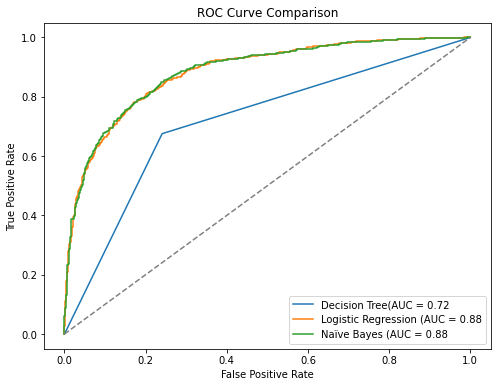

In [21]:
# ROC Curve comparison
nb_probs = nb_model.predict_proba(X_test)[:, 1]
dt_probs = tree.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree(AUC = {auc(dt_fpr, dt_tpr):.2f}')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {auc(lr_fpr, lr_tpr):.2f}')
plt.plot(nb_fpr, nb_tpr, label=f'Naïve Bayes (AUC = {auc(nb_fpr, nb_tpr):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

### Conclusion and Analysis

In [22]:
import random
# Randomly select two samples from the test data
random_samples = random.sample(range(len(X_test)), 2)
X_samples = X_test.iloc[random_samples]
y_samples = y_test.iloc[random_samples]

# Predict the target variable for the selected samples
y_pred_samples = lr_model.predict(X_samples)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [23]:

for i, sample_index in enumerate(random_samples):
    print(f"Sample {i + 1}:")
    print("Actual:", y_samples.iloc[i])
    print("Predicted:", y_pred_samples[i])
    print("-" * 20)


Sample 1:
Actual: 0
Predicted: 1
--------------------
Sample 2:
Actual: 1
Predicted: 1
--------------------


In [28]:
print("- Out of the 3 models, logistic regression & Naive Bayes seems to gives the better output than decision tree for this dataset\n")
print("- If speed and simplicity are priorities, Naïve Bayes is useful.")
print("- If features are independent, Naïve Bayes works well, else Logistic Regression is preferred.")
print("- Logistic Regression usually performs better for well-separated classes.")
print("- Decision Tree is Simple model, easy to interpret but is prone to overfitting without hyperparameter tuning")


- Out of the 3 models, logistic regression & Naive Bayes seems to gives the better output than decision tree for this dataset

- If speed and simplicity are priorities, Naïve Bayes is useful.
- If features are independent, Naïve Bayes works well, else Logistic Regression is preferred.
- Logistic Regression usually performs better for well-separated classes.
- Decision Tree is Simple model, easy to interpret but is prone to overfitting without hyperparameter tuning
